In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from dataclasses import dataclass

import vice

In [33]:
import surp
from surp.src.analysis.vice_model import vice_model
import surp.src.analysis.apogee_analysis as aah
from surp.src.analysis import plotting_utils as pluto
import arya
arya.save_at("./figures")

In [20]:
@dataclass
class model_id():
    agb: str = None
    eta: str = None
    f_agb: str = None
    beta: str = None
    name: str = None
    version: str = ""


def find_model(id):
    """
    Finds the pickled model with either the given name or the parameters 
    and returns the vice_model object
    """
    if id.name is None:
        name = id.agb + "_f" + id.f_agb + "_Z" + id.beta + "_eta" + id.eta + id.version
    else:
        name = id.name
    file_name = "../output/" + name + ".json"
    return vice_model(file_name)


fiducial = find_model(model_id(agb="cristallo11", f_agb="0.2", eta="1.0",
    beta="0.4", version="_v0.1.3"))



one file saved at ./figures/evo_slices.pdf


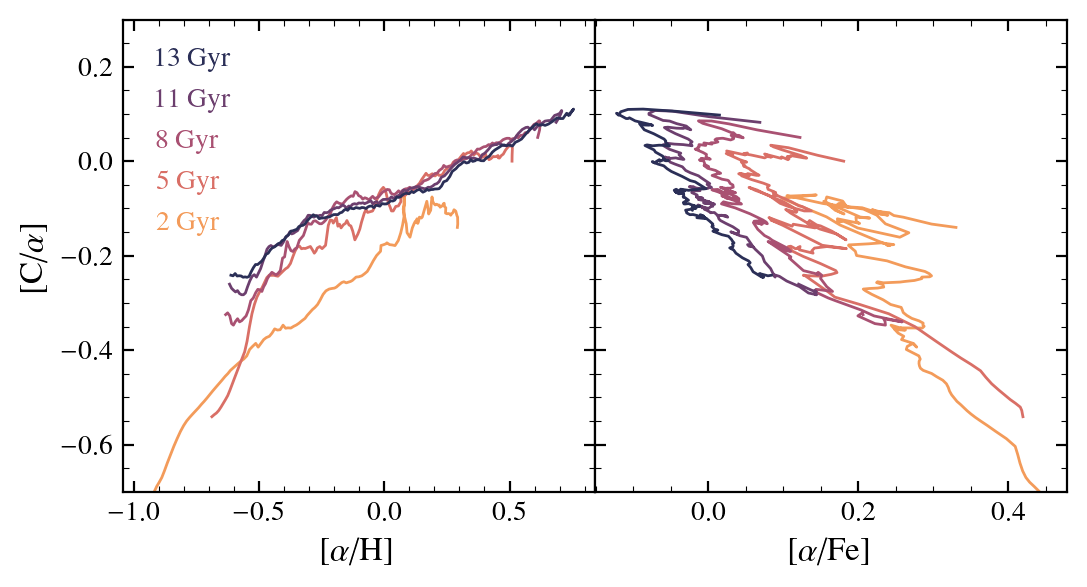

In [21]:
jp = arya.JoinPlot(1, 2)

sp = jp.children[0][0]

fiducial.plot_t_slices("[o/h]", "[c/o]", ax=sp.mpl_ax)

sp.x.label = r"[$\alpha$/H]"
sp.y.lim = (-0.7, 0.3)
sp.y.label = r"[C/$\alpha$]"

sp = jp.children[0][1]


fiducial.plot_t_slices("[o/fe]", "[c/o]", ax=sp.mpl_ax, legend=False)
sp.x.label = r"[$\alpha$/Fe]"
sp.y.label = r""
sp.save("evo_slices.pdf")

one file saved at ./figures/evo_tracks.pdf


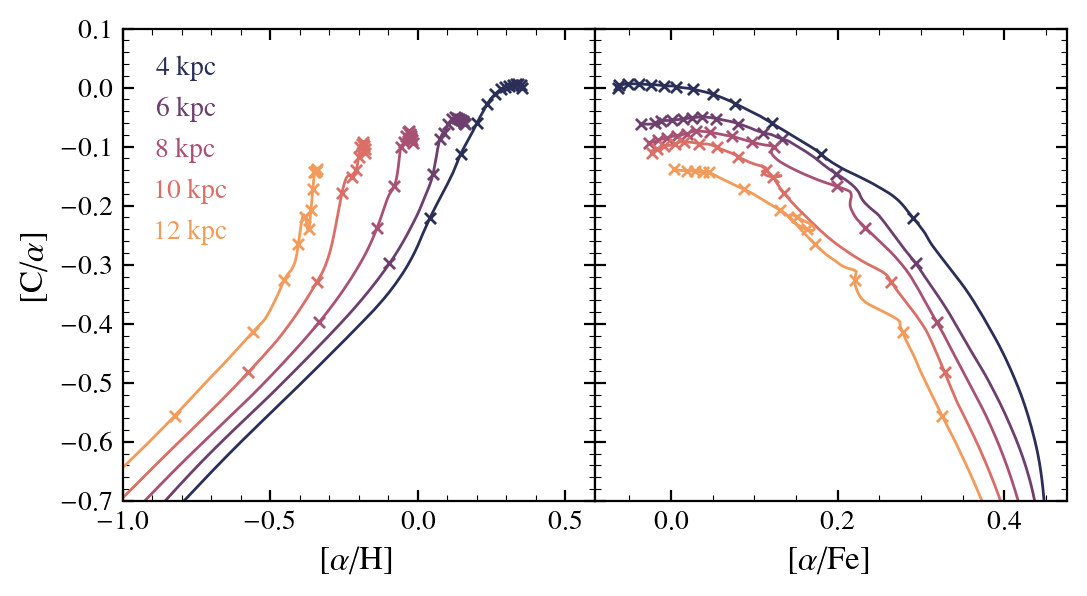

In [22]:
jp = arya.JoinPlot(1, 2)

sp = jp.children[0][0]

fiducial.plot_R_slices("[o/h]", "[c/o]", ax=sp.mpl_ax)

sp.x.label = r"[$\alpha$/H]"
sp.y.label = r"[C/$\alpha$]"
sp.x.lim = (-1, 0.6)
sp.y.lim = (-0.7, 0.1)


sp = jp.children[0][1]

fiducial.plot_R_slices("[o/fe]", "[c/o]", ax=sp.mpl_ax, legend=False)
sp.x.label = r"[$\alpha$/Fe]"
sp.y.label = r""

sp.save("evo_tracks.pdf")

In [25]:
def plot_coofe(models, o0=-0.0, ax=None):
    
    if ax is None:
        ax = plt.gca()
    
    name_0 = list(models.keys())[0]

    for o in [o0]:
        for name, model in models.items():
            model.plot_mean_coofe(xlim=(-0.3, 0.3), label=name, plot_data=False, o_h_0=o, star_group="solar", ax=ax)
        ax.set_title("[O/H] = %1.1f" % o)
        # legend_outside()  
        # plt.show()
    
    coofe_data(zorder=-2)

In [26]:
def compare_cooh(models, ax=None):
    if ax is None:
        ax = plt.gca()
        
    name_0 = list(models.keys())[0]
    i = 0
    for name, model in models.items():
        f = model.plot_mean_stars("[o/h]", "[c/o]", xlim=(-3.6, 0.6), label=name, plot_data=False, ax=ax)
        i+= 1
    # legend_outside()
    cooh_data(zorder=-2)
    return f    


In [34]:
def cooh_data(ax=None, **params):
    if ax is None:
        ax = plt.gca()
        
    
    ha = aah.subgiants["high_alpha"]

    df = aah.subgiants[~ha]
    
    pluto.plot_mean_track(df["MG_H"], df["C_MG"], xlim=(-0.5, 0.5), c="k", 
                          dropna=True, min_count=True, plot_points=True, shade_width=False, plot_errorbar=False, plot_alt=True,
                          **params)
    
def coofe_data(o_0=-0.1, w=0.05, ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()
        
    filt = aah.subgiants["MG_H"] > o_0 - w
    filt &= aah.subgiants["MG_H"] < o_0 + w
    df = aah.subgiants[filt]
    
    pluto.plot_mean_track(df["MG_FE"], df["C_MG"], xlim=(-0.1, 0.5), c="k", 
                           dropna=True, min_count=True, plot_points=True, shade_width=False, plot_errorbar=False, plot_alt=True,
                          **kwargs)

In [102]:
def compare(names, labels, filename=None):
    models = {label: find_model(name) for name, label in zip(names, labels)}
    
    jp = arya.JoinPlot(1, 2)

    sp = jp.children[0][0]
    pluto.fancy_legend(ax=sp.mpl_ax)

    plt.sca(sp.mpl_ax)
    compare_cooh(models)  

    sp.x.label = r"[Mg/H]"
    sp.y.label = r"[C/Mg]"
    sp.x.lim = (-0.6, 0.6) 
    sp.y.lim = (-0.4, 0.1)
    sp.x.ticks = [-0.6, -0.4, -0.2, 0, 0.2, 0.4]
    
    
    sp = jp.children[0][1]
    plt.sca(sp.mpl_ax)
    plot_coofe(models)
    
    
    sp.x.label = r"[Mg/Fe]"
    sp.y.label = r""
    sp.x.lim = (-0.15, 0.4)
    sp.mpl_ax.set_title("")
    
    if filename is not None:
        sp.save(filename)


In [ ]:
names = []
for agb in ["cristallo11", "karakas10", "ventura13", "karakas16"]:
    names.append(model_id(agb=agb, f_agb="o", beta="0.4", eta="1.0", version="_v0.1.3"))
labels = ["C11", "K10", "V13", "K16"]
compare(names, labels, filename="oob_agb.pdf")

In [ ]:
names = []
for f in ["0.1", "0.2", "0.4"]:
    names.append(model_id(agb="cristallo11", f_agb=f, beta="0.4", eta="1.0", version="_v0.1.3"))
labels = ["$f=0.1$", "$f=0.2$", "$f=0.4$"]
compare(names, labels, filename="f_agb.pdf")

In [ ]:
names = []
for beta in ["0.2", "0.4", "0.6"]:
    names.append(model_id(agb="cristallo11", f_agb="0.2", beta=beta, eta="1.0", version="_v0.1.3"))
labels = [r"$\beta=0.2$", r"$\beta=0.4$", r"$\beta=0.6$"]
compare(names, labels, filename="beta.pdf")


In [ ]:
fnames = ["cristallo11_f0.2_Z0.4_eta1.0_v0.1.3", "cristallo11_f0.2_Z0.4_eta1.0_v0.1.3_lateburst", "cristallo11_f0.4_Z0.4_eta1.0_v0.1.3_lateburst",  "cristallo11_f0.2_Z0.4_eta0.3_v0.1.3"]
names = []
for s in fnames:
    names.append(model_id(name=s))
    
labels=["fiducial", "lateburst", "lateburs, f=0.4", r"reduced $\eta$"]
compare(names, labels, filename="lateburst_eta.pdf")

In [73]:
s = fiducial.stars["solar"]
N = len(s)
dx = 0.03
dy = 0.03
sp = arya.Subplot()
aah.plot_contour("[mg/h]", "[c/mg]", ax=sp.mpl_ax, zorder=3)

scat = arya.Scatter(s["[o/h]"] + np.random.normal(0, dx, N), s["[c/o]"] + np.random.normal(0, dy, N), 
             c = s["r_origin"], s=0.2, zorder=2, subplot=sp)
scat.clim = (0, 12)
cb = arya.Colorbar(subplot=sp, layer=scat, row=0, col=1)
cb.label = "$R_0$ (kpc)"


sp.x.label=r"[$\alpha$/H]"
sp.y.label=r"[C/$\alpha$]"
sp.x.lim=(-0.6, 0.6)
sp.y.lim=(-0.3, 0.2)

sp.save("cooh_scatter.pdf")

/users/PAS2232/aeyobd/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/users/PAS2232/aeyobd/python/arya/plotting/colorbar.py:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  self.mpl_ax = self.figure.mpl_fig.add_subplot()


RuntimeError: latex was not able to process the following string:
b'MG_H'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/users/PAS2232/aeyobd/.cache/matplotlib/tex.cache/44d25ff37fba48ee4a1c4f47524e
843c.tex
LaTeX2e <2019-10-01> patch level 3
(/apps/texlive/2018/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/10/25 v1.4k Standard LaTeX document class
(/apps/texlive/2018/texmf-dist/tex/latex/base/size10.clo))
(/apps/texlive/2018/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/apps/texlive/2018/texmf-dist/tex/latex/cm-super/type1ec.sty
(/apps/texlive/2018/texmf-dist/tex/latex/base/t1cmr.fd))
(/apps/texlive/2018/texmf-dist/tex/latex/base/inputenc.sty)
(/apps/texlive/2018/texmf-dist/tex/latex/geometry/geometry.sty
(/apps/texlive/2018/texmf-dist/tex/latex/graphics/keyval.sty)
(/apps/texlive/2018/texmf-dist/tex/generic/iftex/ifvtex.sty
(/apps/texlive/2018/texmf-dist/tex/generic/iftex/iftex.sty))

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/apps/texlive/2018/texmf-dist/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/apps/texlive/2018/texmf-dist/tex/latex/amsmath/amstext.sty
(/apps/texlive/2018/texmf-dist/tex/latex/amsmath/amsgen.sty))
(/apps/texlive/2018/texmf-dist/tex/latex/amsmath/amsbsy.sty)
(/apps/texlive/2018/texmf-dist/tex/latex/amsmath/amsopn.sty))
(/apps/texlive/2018/texmf-dist/tex/latex/txfonts/txfonts.sty)
(/apps/texlive/2018/texmf-dist/tex/latex/base/textcomp.sty
(/apps/texlive/2018/texmf-dist/tex/latex/base/ts1enc.def
(/apps/texlive/2018/texmf-dist/tex/latex/base/ts1enc.dfu)))
No file 44d25ff37fba48ee4a1c4f47524e843c.aux.
(/apps/texlive/2018/texmf-dist/tex/latex/txfonts/omltxmi.fd)
(/apps/texlive/2018/texmf-dist/tex/latex/txfonts/omstxsy.fd)
(/apps/texlive/2018/texmf-dist/tex/latex/txfonts/omxtxex.fd)
(/apps/texlive/2018/texmf-dist/tex/latex/txfonts/utxexa.fd)
(/apps/texlive/2018/texmf-dist/tex/latex/base/ts1cmr.fd)
(/apps/texlive/2018/texmf-dist/tex/latex/txfonts/ot1txr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily MG_
                   H}
No pages of output.
Transcript written on 44d25ff37fba48ee4a1c4f47524e843c.log.




RuntimeError: latex was not able to process the following string:
b'MG_H'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/users/PAS2232/aeyobd/.cache/matplotlib/tex.cache/44d25ff37fba48ee4a1c4f47524e
843c.tex
LaTeX2e <2019-10-01> patch level 3
(/apps/texlive/2018/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/10/25 v1.4k Standard LaTeX document class
(/apps/texlive/2018/texmf-dist/tex/latex/base/size10.clo))
(/apps/texlive/2018/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/apps/texlive/2018/texmf-dist/tex/latex/cm-super/type1ec.sty
(/apps/texlive/2018/texmf-dist/tex/latex/base/t1cmr.fd))
(/apps/texlive/2018/texmf-dist/tex/latex/base/inputenc.sty)
(/apps/texlive/2018/texmf-dist/tex/latex/geometry/geometry.sty
(/apps/texlive/2018/texmf-dist/tex/latex/graphics/keyval.sty)
(/apps/texlive/2018/texmf-dist/tex/generic/iftex/ifvtex.sty
(/apps/texlive/2018/texmf-dist/tex/generic/iftex/iftex.sty))

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/apps/texlive/2018/texmf-dist/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/apps/texlive/2018/texmf-dist/tex/latex/amsmath/amstext.sty
(/apps/texlive/2018/texmf-dist/tex/latex/amsmath/amsgen.sty))
(/apps/texlive/2018/texmf-dist/tex/latex/amsmath/amsbsy.sty)
(/apps/texlive/2018/texmf-dist/tex/latex/amsmath/amsopn.sty))
(/apps/texlive/2018/texmf-dist/tex/latex/txfonts/txfonts.sty)
(/apps/texlive/2018/texmf-dist/tex/latex/base/textcomp.sty
(/apps/texlive/2018/texmf-dist/tex/latex/base/ts1enc.def
(/apps/texlive/2018/texmf-dist/tex/latex/base/ts1enc.dfu)))
(./44d25ff37fba48ee4a1c4f47524e843c.aux)
(/apps/texlive/2018/texmf-dist/tex/latex/txfonts/omltxmi.fd)
(/apps/texlive/2018/texmf-dist/tex/latex/txfonts/omstxsy.fd)
(/apps/texlive/2018/texmf-dist/tex/latex/txfonts/omxtxex.fd)
(/apps/texlive/2018/texmf-dist/tex/latex/txfonts/utxexa.fd)
(/apps/texlive/2018/texmf-dist/tex/latex/base/ts1cmr.fd)
(/apps/texlive/2018/texmf-dist/tex/latex/txfonts/ot1txr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily MG_
                   H}
No pages of output.
Transcript written on 44d25ff37fba48ee4a1c4f47524e843c.log.




<Figure size 606.237x617.057 with 1 Axes>

/users/PAS2232/aeyobd/python/arya/plotting/colorbar.py:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  self.mpl_ax = self.figure.mpl_fig.add_subplot()


AttributeError: 'NoneType' object has no attribute 'transformed'

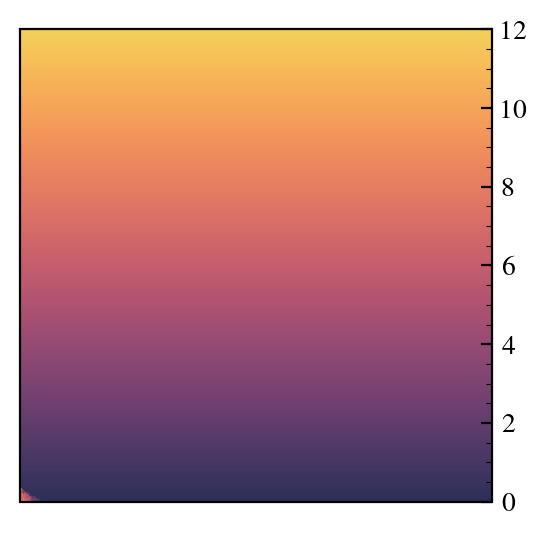

In [75]:
s = fiducial.stars["solar"]
N = len(s)
dx = 0.03
dy = 0.03
sp = arya.Subplot()
#aah.plot_contour("[mg/h]", "[c/n]", ax=sp.mpl_ax, zorder=3)

scat = arya.Scatter(s["[o/h]"] + np.random.normal(0, dx, N), s["[c/n]"] + np.random.normal(0, dy, N), 
             c = s["r_origin"], s=0.2, zorder=2, subplot=sp)
scat.clim = (0, 12)
cb = arya.Colorbar(subplot=sp, layer=scat, row=0, col=1)
cb.label = "$R_0$ (kpc)"


sp.x.label=r"[$\alpha$/H]"
sp.y.label=r"[C/N]"
sp.x.lim=(-0.6, 0.6)
sp.y.lim=(-0.5, 0.4)

sp.save("cnoh_scatter.pdf")

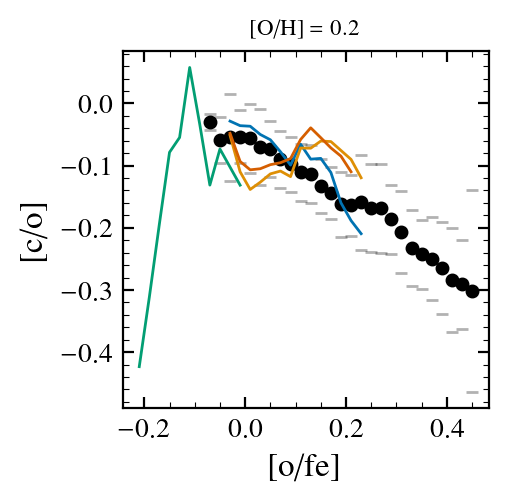

In [76]:
names = []
for agb in ["cristallo11", "karakas10", "ventura13", "karakas16"]:
    names.append(model_id(agb=agb, f_agb="0.4", beta="0.4", eta="1.0", version="_v0.1.3_lateburst"))
labels = ["C11$'$", "K10$'$", "V13$'$", "K16$'$"]
models = {label: find_model(name) for name, label in zip(names, labels)}


one file saved at ./figures/coofe_agb_extra_0.2.pdf


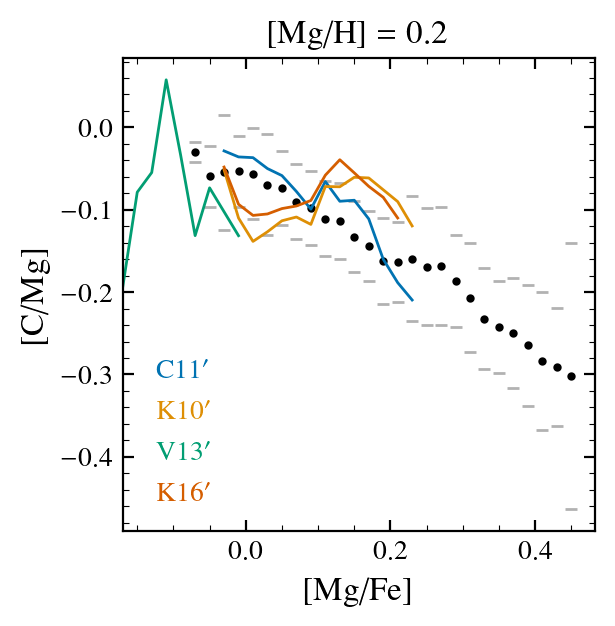

In [101]:
sp = arya.Subplot()
plot_coofe(models, 0.2)
plt.xlabel("[Mg/Fe]")
plt.ylabel("[C/Mg]")
plt.xlim(-0.17)
pluto.fancy_legend()
plt.title(r"$[\text{Mg/H}]=0.2$", fontsize="large")

sp.save("coofe_agb_extra_0.2.pdf")

one file saved at ./figures/coofe_agb_extra.pdf


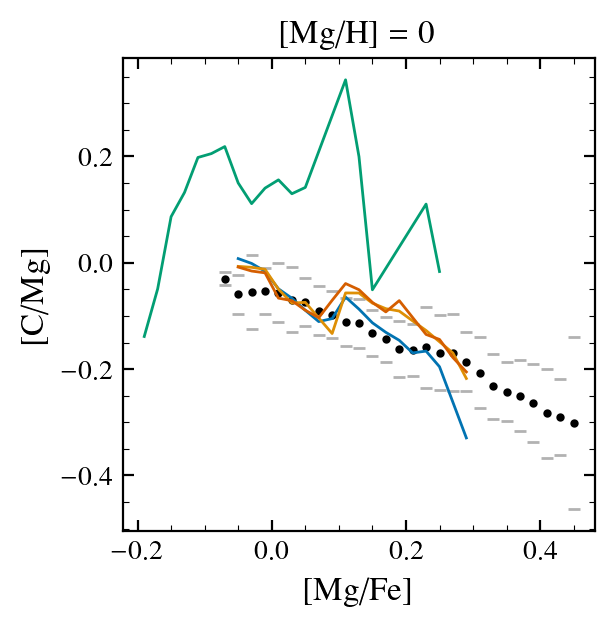

In [99]:
sp = arya.Subplot()
plot_coofe(models, 0)

plt.xlabel("[Mg/Fe]")
plt.ylabel("[C/Mg]")
plt.title(r"$[\text{Mg/H}]=0$", fontsize="large")
sp.save("coofe_agb_extra.pdf")